In [42]:
from typing import TypedDict
from langgraph.graph import StateGraph , START , END
import random

class AgentState(TypedDict):
    value_1:int
    value_2:int
    output : float

    


In [32]:
def roll_dice_1(state:AgentState) -> AgentState:
    state['value_1'] = random.randint(1, 6)
    return state


def roll_dice_2(state:AgentState) -> AgentState:
    state['value_2'] = random.randint(1, 6)
    return state


def router(state:AgentState) -> str:
    if state['value_1'] % 2 == 0 and state['value_2'] % 2 == 0:
        return "division"
    
    if state['value_1'] % 2 == 1 and state['value_2'] % 2 == 1:
        return "multiplication"
    else:
        return "addition"


def multiplier(state:AgentState) -> AgentState:
    state['output'] = state['value_1'] * state['value_2']
    return state


def adder(state:AgentState) -> AgentState:
    state['output'] = state['value_1'] + state['value_2']
    return state


def divider(state:AgentState) -> AgentState:
    state['output'] = state['value_1'] / state['value_2']
    return state

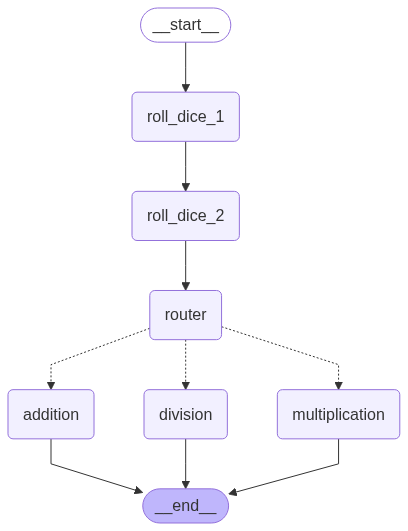

In [33]:
graph = StateGraph(AgentState)

graph.add_node("roll_dice_1", roll_dice_1)
graph.add_node("roll_dice_2", roll_dice_2)
graph.add_node("router", lambda state: state)


graph.add_node("multiplication", multiplier)
graph.add_node("addition", adder)
graph.add_node("division", divider)

graph.add_edge(START, "roll_dice_1")
graph.add_edge("roll_dice_1", "roll_dice_2")
graph.add_edge("roll_dice_2", "router")

graph.add_conditional_edges(
    "router",
    router,
    {
        "multiplication": "multiplication",
        "addition": "addition",
        "division": "division"
    }
)

graph.add_edge('router',END)

compiled_graph = graph.compile()

compiled_graph

In [41]:
compiled_graph.invoke(AgentState(value=0))

{'value_1': 3, 'value_2': 5, 'output': 15}